In [1]:
!pip install -r requirements.txt


[notice] A new release of pip available: 22.3 -> 23.0
[notice] To update, run: pip install --upgrade pip


In [18]:
import alg.StellarRadio_alg
%load_ext autoreload
%autoreload 2
stellar_init = alg.StellarRadio_alg.StellarRadioAlg()
time,flux,quarter,simmf = stellar_init.run_all_steps()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
cadence type: long
Frequency guess: 14.187637075855344
Iteration 0
mix: 1000.0 14.187637075855344 -1.0 0.0 -0.013443589210510254 0.00013246499315282026 (0.8524053399343429-0.12720753878105676j)
0.746838007037312 0.7294612730008921 0.017376734036419886
Amps: 1000.0 1157.1423654552461
mix: 1157.1423654552461 14.187637075855344 -1.0 0.0 -0.013443589210510254 0.00013246499315282026 (0.9863543313783086-0.14719723232885193j)
Phases: -1.0 -1.1481403523964162
mix: 1157.1423654552461 14.187637075855344 -1.1481403523964162 0.0 -0.013443589210510254 0.00013246499315282026 (0.9972772394043735-1.9225866799549196e-12j)
Frequencies: 14.187637075855344 14.187634369778326
Iteration 1
mix: 1157.1423654552461 14.187634369778326 -1.1481403523964162 0.0 -0.013443589210510254 0.00013246499315282026 (0.997064832695915-0.014522461620822243j)
1.0000000445939938 0.9979654342551763 0.002034610338817691
Amps: 1157.142365455246

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
pickle file exists for object
[ 131.51233353  131.53276813  131.55320262 ... 1590.96044706 1590.98088145
 1591.00131604] [0.00712657 0.00367057 0.0003463  ... 0.01157069 0.00786746 0.0113157 ] [ 0  0  0 ... 16 16 16] 14.187637075855344 [6.85171325e-05 2.05551398e-04 3.42585663e-04 ... 1.10391035e+02
 1.10391172e+02 1.10391310e+02] [1.98791420e-06 2.22896732e-06 3.28637957e-06 ... 7.69796985e-07
 1.15843772e-06 1.21286836e-06] [ 0.08961444  0.08959851  0.08958559 ... -0.2099764  -0.21004876
 -0.21007254]


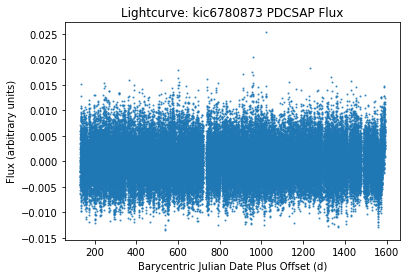

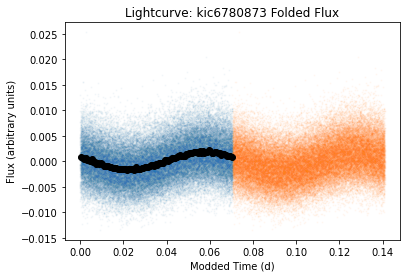

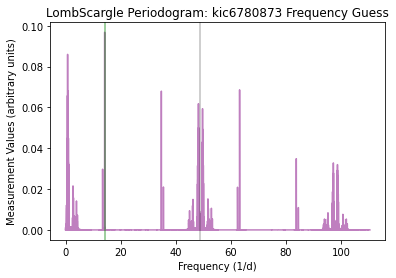

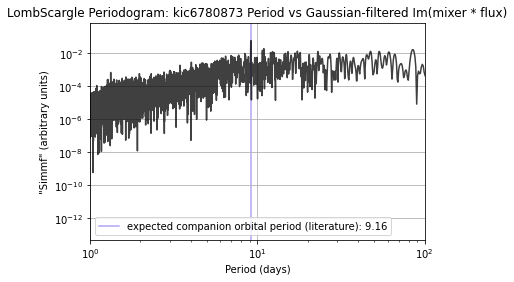

In [19]:
import alg.StellarRadio_plotting
%load_ext autoreload
%autoreload 2
plot_init = alg.StellarRadio_plotting.StellarRadioAlg_Plotting()
plot_init.do_plots()

In [20]:
import numpy as np

# choose parameters for injected frequency
amp_fake = .0015 #flux units
freq_fake = 70 + np.e/2 #inverse days
phase_fake = 2 #0 to 2pi #radians
planet_period_fake = 17.56 #days
planet_amp_fake = 1e-3 #days -> this is about one second
planet_phase_fake = 1 #radians

print(amp_fake,freq_fake,phase_fake)

0.0015 71.35914091422953 2


In [21]:
distorted_time = time + planet_amp_fake * np.cos(2 * np.pi *time / planet_period_fake + planet_phase_fake) 
flux_fake = flux + amp_fake * np.cos(2*np.pi *freq_fake * distorted_time + phase_fake)

In [22]:
time,flux_fake,quarter,simmf = stellar_init.run_all_steps(injection_flux=flux_fake,qmin=65,qmax=80)

cadence type: long
Frequency guess: 71.3591546413709
Iteration 0
mix: 1157.1423396544444 71.3591546413709 -1.1627045361983865 1.8194593635607707e-05 -0.014203363534398323 0.00013312740784761245 (0.5969015418530009-0.5691924998735916j)
0.7453820430118779 0.3872938842334165 0.3580881587784615
Amps: 1157.1423396544444 1340.285507715608
mix: 1340.285507715608 71.3591546413709 -1.1627045361983865 1.8194593635607707e-05 -0.014203363534398323 0.00013312740784761245 (0.6913743095059396-0.6592797035745926j)
Phases: -1.1627045361983865 -1.9243449000596848
mix: 1340.285507715608 71.3591546413709 -1.9243449000596848 1.8194593635607707e-05 -0.014203363534398323 0.00013312740784761245 (0.9553262078425974-1.3010367151138059e-11j)
Frequencies: 71.3591546413709 71.35915379070349
Iteration 1
mix: 1340.285507715608 71.35915379070349 -1.9243449000596848 1.8194593635607707e-05 -0.014203363534398323 0.00013312740784761245 (0.9553914468216861-0.004365031062421924j)
0.9999999598680677 0.9152648125507414 0.084

pickle file exists for object
[ 131.51233353  131.53276813  131.55320262 ... 1590.96044706 1590.98088145
 1591.00131604] [0.00823888 0.00285439 0.00081143 ... 0.01274876 0.00696707 0.01187823] [ 0  0  0 ... 16 16 16] 71.3591546413709 [6.85171325e-05 2.05551398e-04 3.42585663e-04 ... 1.10391035e+02
 1.10391172e+02 1.10391310e+02] [1.82813974e-06 2.08331364e-06 3.13297863e-06 ... 4.60206617e-07
 7.09440099e-07 7.48756687e-07] [0.07183317 0.07181057 0.07172828 ... 0.00357954 0.00332278 0.00321558]


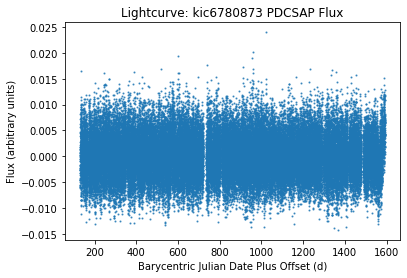

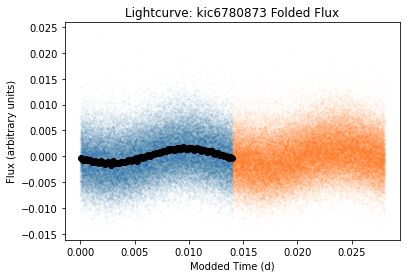

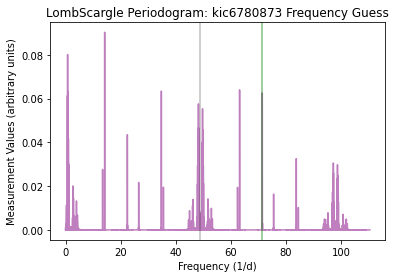

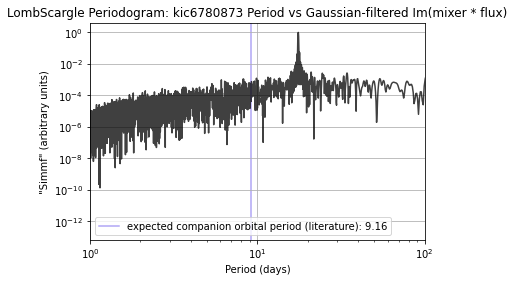

In [23]:
plot_init.do_plots() #we expect a peak at 17.56 days!